# Prepare Input meteo from Morin paper for Col de la Porte site
 ---
**Description:** this script will compare simulated and observed data for Col de la Porte test site (France)

**Author:** Elisa Bortoli (elisa.bortoli@eurac.edu)

**Credits:** Giacomo Bertoldi (giacomo.bertoldi@eurac.edu)

**Date:** 2019-08-01

**Version:** 1.0

**Usage:** simple run

**Python version:** 3.6.8

**Requirements:** Python modules: os, glob, sys, pandas, numpy, matplotlib, netCDF4
 
 **Notes:** 
 - The test setup can be found at:
https://github.com/geotopmodel/geotop/tree/v3.0/tests/1D/ColdelaPorte


 - Infos about all the measured data can be found at:
http://doi.osug.fr/public/CRYOBSCLIM_CDP/CRYOBSCLIM.CDP.2018.html


- The measured data used are those of CRYOBSCLIM.CDP.2018.HourlySnow.zip that can be found at:
http://doi.osug.fr/data/public/CRYOBSCLIM_CDP/

## Import the necessary modules

In [40]:
import os 
import glob 
import sys
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import math

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;
// avoid output into scrollable frames

<IPython.core.display.Javascript object>

In [3]:
# %matplotlib notebook

## Set the simulation path

In [4]:
obs_path = r"/home/elisa/paper_GEOtop/tests/ColdelaPorte/data_observed/Morin2012/datasets"
obs_path

'/home/elisa/paper_GEOtop/tests/ColdelaPorte/data_observed/Morin2012/datasets'

## Load data


In [5]:
# Print all the files in a directory
obs_files = os.listdir(obs_path)
obs_files = sorted(obs_files, key=str.lower)

obs_files

['CDP_daily_eval.tab',
 'CDP_dataset-links.tab',
 'CDP_hor_disk.tab',
 'CDP_hor_eval.tab',
 'CDP_met_insitu.tab',
 'CDP_soil_temp.tab',
 'CDP_solar_mask.tab',
 'meteo0001.txt',
 'Prec_rain_snow.png',
 'Snow_thick.png']

In [6]:
os.chdir(obs_path)
os.getcwd()

'/home/elisa/paper_GEOtop/tests/ColdelaPorte/data_observed/Morin2012/datasets'

In [7]:
%%bash
head -10 *.tab

==> CDP_daily_eval.tab <==
Date/Time	Snow thick [m] (Ultra-sound or laser depth ra...)	Snow thick [m] (pit)	Snow thick [m] (pit south)	Snow thick [m] (pit north)	SWE [kg/m**2] (Cosmic Ray Counter, NRC)	SWE [kg/m**2] (pit)	SWE [kg/m**2] (pit south)	SWE [kg/m**2] (pit north)	Runoff [kg/m**2/day] (Lysimeter, 5 m**2)	Runoff [kg/m**2/day] (Lysimeter, 1 m**2)	Albedo [%]
1993-09-21	0.00										
1993-09-22	0.00										
1993-09-23	0.00										
1993-09-24	0.00										
1993-09-25	0.00										
1993-09-26	0.00										
1993-09-27	0.00										
1993-09-28	0.00										
1993-09-29	0.00										

==> CDP_dataset-links.tab <==
File name	File format	Comment	URL file
CDP_daily_eval	netCDF, zipped	Snowpack-related evaluation data at the daily time resolution (automated and manual snowdepth and SWE, runoff, albedo). The time information of each record is daily at 12:00 UTC.	hdl:10013/epic.38613.d001
CDP_hor_disk	netCDF, zipped	Settling disk information (temperature, height above ground) at th

In [8]:
obs_files

['CDP_daily_eval.tab',
 'CDP_dataset-links.tab',
 'CDP_hor_disk.tab',
 'CDP_hor_eval.tab',
 'CDP_met_insitu.tab',
 'CDP_soil_temp.tab',
 'CDP_solar_mask.tab',
 'meteo0001.txt',
 'Prec_rain_snow.png',
 'Snow_thick.png']

## 1. CDP_daily_eval

In [9]:
daily_eval = pd.read_csv('CDP_daily_eval.tab', sep='\t',
                         parse_dates = ['Date/Time'], # Date format is correct
                         index_col = ['Date/Time'], # No more element indexes
                         dayfirst = True) # Coherent date format

print("list(daily_eval) = ", list(daily_eval))
print("len(daily_eval) = ", len(daily_eval))
print("start = ", daily_eval.index.min())
print("end   = ", daily_eval.index.max())
daily_eval.head()

list(daily_eval) =  ['Snow thick [m] (Ultra-sound or laser depth ra...)', 'Snow thick [m] (pit)', 'Snow thick [m] (pit south)', 'Snow thick [m] (pit north)', 'SWE [kg/m**2] (Cosmic Ray Counter, NRC)', 'SWE [kg/m**2] (pit)', 'SWE [kg/m**2] (pit south)', 'SWE [kg/m**2] (pit north)', 'Runoff [kg/m**2/day] (Lysimeter, 5 m**2)', 'Runoff [kg/m**2/day] (Lysimeter, 1 m**2)', 'Albedo [%]']
len(daily_eval) =  5159
start =  1993-09-21 00:00:00
end   =  2011-06-12 00:00:00


,Snow thick [m] (Ultra-sound or laser depth ra...),Snow thick [m] (pit),Snow thick [m] (pit south),Snow thick [m] (pit north),"SWE [kg/m**2] (Cosmic Ray Counter, NRC)",SWE [kg/m**2] (pit),SWE [kg/m**2] (pit south),SWE [kg/m**2] (pit north),"Runoff [kg/m**2/day] (Lysimeter, 5 m**2)","Runoff [kg/m**2/day] (Lysimeter, 1 m**2)",Albedo [%]
Date/Time,,,,,,,,,,,
1993-09-21,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-23,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-09-25,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Find NaN

In [10]:
df_NaN = daily_eval.isna().sum()
df_NaN_perc = df_NaN/len(daily_eval)*100

print(" -------------- NaN values -------------- ")
print(df_NaN)
print(" -------------- NaN percentage -------------- ")
print(df_NaN_perc)

 -------------- NaN values -------------- 
Snow thick [m] (Ultra-sound or laser depth ra...)     422
Snow thick [m] (pit)                                 4859
Snow thick [m] (pit south)                           5003
Snow thick [m] (pit north)                           5004
SWE [kg/m**2] (Cosmic Ray Counter, NRC)              2849
SWE [kg/m**2] (pit)                                  4862
SWE [kg/m**2] (pit south)                            5003
SWE [kg/m**2] (pit north)                            5003
Runoff [kg/m**2/day] (Lysimeter, 5 m**2)              391
Runoff [kg/m**2/day] (Lysimeter, 1 m**2)             1003
Albedo [%]                                            970
dtype: int64
 -------------- NaN percentage -------------- 
Snow thick [m] (Ultra-sound or laser depth ra...)     8.179880
Snow thick [m] (pit)                                 94.184920
Snow thick [m] (pit south)                           96.976158
Snow thick [m] (pit north)                           96.995542
SWE [kg

### Plot data

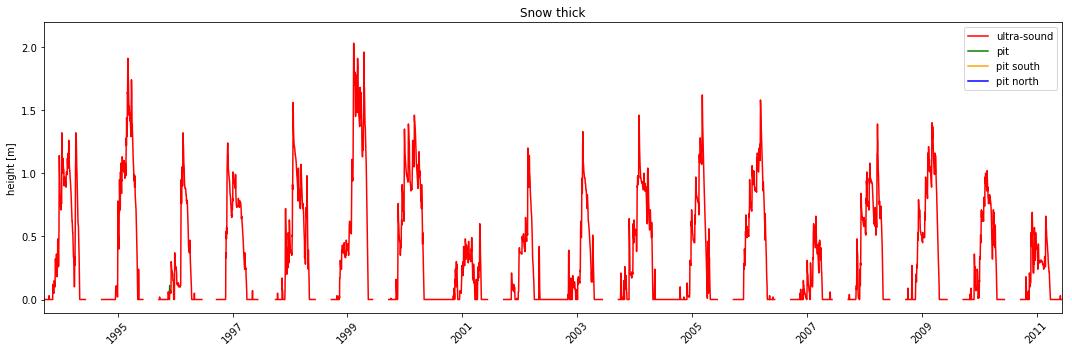

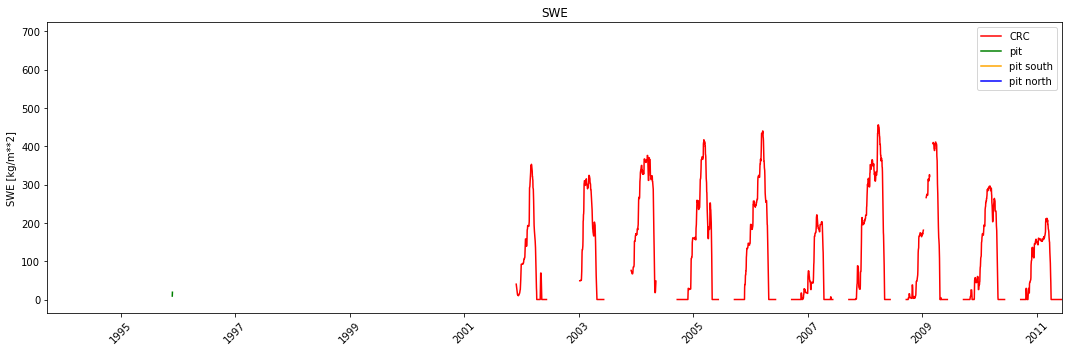

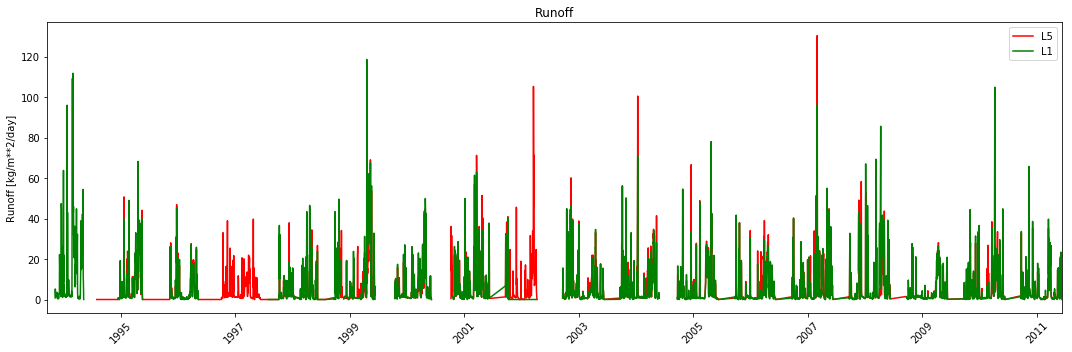

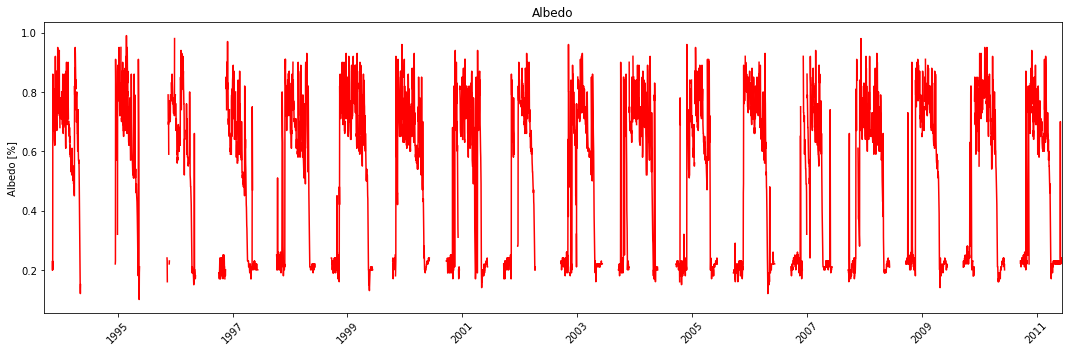

In [11]:
plt.figure(figsize = (15,5))
plt.plot(daily_eval.index, daily_eval['Snow thick [m] (Ultra-sound or laser depth ra...)'], color='red')
plt.plot(daily_eval.index, daily_eval['Snow thick [m] (pit)'], color='green')
plt.plot(daily_eval.index, daily_eval['Snow thick [m] (pit south)'], color='orange')
plt.plot(daily_eval.index, daily_eval['Snow thick [m] (pit north)'], color='blue')
plt.xticks(rotation=45)
plt.xlim(daily_eval.index.min(), daily_eval.index.max())
plt.legend(['ultra-sound', 'pit', 'pit south', 'pit north' ]) 
plt.ylabel("height [m]")
plt.title("Snow thick")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(daily_eval.index, daily_eval['SWE [kg/m**2] (Cosmic Ray Counter, NRC)'], color='red')
plt.plot(daily_eval.index, daily_eval['SWE [kg/m**2] (pit)'], color='green')
plt.plot(daily_eval.index, daily_eval['SWE [kg/m**2] (pit south)'], color='orange')
plt.plot(daily_eval.index, daily_eval['SWE [kg/m**2] (pit north)'], color='blue')
plt.xticks(rotation=45)
plt.xlim(daily_eval.index.min(), daily_eval.index.max())
plt.legend(['CRC', 'pit', 'pit south', 'pit north' ]) 
plt.ylabel("SWE [kg/m**2]")
plt.title("SWE")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(daily_eval.index, daily_eval['Runoff [kg/m**2/day] (Lysimeter, 5 m**2)'], color='red')
plt.plot(daily_eval.index, daily_eval['Runoff [kg/m**2/day] (Lysimeter, 1 m**2)'], color='green')
plt.xticks(rotation=45)
plt.xlim(daily_eval.index.min(), daily_eval.index.max())
plt.legend(['L5', 'L1']) 
plt.ylabel("Runoff [kg/m**2/day]")
plt.title("Runoff")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(daily_eval.index, daily_eval['Albedo [%]'], color='red')
plt.xticks(rotation=45)
plt.xlim(daily_eval.index.min(), daily_eval.index.max())
plt.ylabel("Albedo [%]")
plt.title("Albedo")
plt.tight_layout()
plt.show()

## 2. CDP_dataset-links


In [12]:
dataset_links = pd.read_csv('CDP_dataset-links.tab', sep='\t',
                            parse_dates = ['File name'], # Date format is correct
                             index_col = ['File name'], # No more element indexes
                             dayfirst = True) # Coherent date format

print("len(daily_eval) = ", len(dataset_links))
dataset_links

len(daily_eval) =  7


,File format,Comment,URL file
File name,,,
CDP_daily_eval,"netCDF, zipped",Snowpack-related evaluation data at the daily ...,hdl:10013/epic.38613.d001
CDP_hor_disk,"netCDF, zipped","Settling disk information (temperature, height...",hdl:10013/epic.38613.d002
CDP_hor_eval,"netCDF, zipped",Snowpack-related evaluation data at the hourly...,hdl:10013/epic.38613.d003
CDP_met_insitu,"netCDF, zipped",Meteorological forcing data at hourly time ste...,hdl:10013/epic.38613.d004
CDP_met_safran,"netCDF, zipped",Meteorological forcing data at hourly time ste...,hdl:10013/epic.38613.d005
CDP_profiles,"ASCII, zipped",directory ascii contains ASCII files (.dat) fo...,hdl:10013/epic.38613.d010
CDP_ascii,"ASCII, zipped",directory profiles contains snow pit data cove...,hdl:10013/epic.38613.d011


## 3. CDP_hor_disk


In [13]:
hor_disk = pd.read_csv('CDP_hor_disk.tab', sep='\t',
                         parse_dates = ['Date/Time'], # Date format is correct
                         index_col = ['Date/Time'], # No more element indexes
                         dayfirst = True) # Coherent date format

print("list(daily_eval) = ", list(hor_disk))
print("len(daily_eval) = ", len(hor_disk))
print("start = ", hor_disk.index.min())
print("end   = ", hor_disk.index.max())
hor_disk.head()

list(daily_eval) =  ['Snow thick [m]', 'SDH [m] (settling disk 1)', 'SDH [m] (settling disk 2)', 'SDH [m] (settling disk 3)', 'SDH [m] (settling disk 4)', 'SDH [m] (settling disk 5)', 'SDH [m] (settling disk 6)', 'SDH [m] (settling disk 7)', 'SDH [m] (settling disk 8)', 'SDH [m] (settling disk 9)', 'SDH [m] (settling disk 10)', 'SDH [m] (settling disk 11)', 't [°C] (attached to settling disk 1)', 't [°C] (attached to settling disk 2)', 't [°C] (attached to settling disk 3)', 't [°C] (attached to settling disk 4)', 't [°C] (attached to settling disk 5)', 't [°C] (attached to settling disk 6)', 't [°C] (attached to settling disk 7)', 't [°C] (attached to settling disk 8)', 't [°C] (attached to settling disk 9)', 't [°C] (attached to settling disk 10)', 't [°C] (attached to settling disk 11)']
len(daily_eval) =  103632
start =  1993-11-10 00:00:00
end   =  2011-06-12 00:00:00


,Snow thick [m],SDH [m] (settling disk 1),SDH [m] (settling disk 2),SDH [m] (settling disk 3),SDH [m] (settling disk 4),SDH [m] (settling disk 5),SDH [m] (settling disk 6),SDH [m] (settling disk 7),SDH [m] (settling disk 8),SDH [m] (settling disk 9),...,t [°C] (attached to settling disk 2),t [°C] (attached to settling disk 3),t [°C] (attached to settling disk 4),t [°C] (attached to settling disk 5),t [°C] (attached to settling disk 6),t [°C] (attached to settling disk 7),t [°C] (attached to settling disk 8),t [°C] (attached to settling disk 9),t [°C] (attached to settling disk 10),t [°C] (attached to settling disk 11)
Date/Time,,,,,,,,,,,,,,,,,,,,,
1993-11-10 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-10 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-10 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-10 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-11-10 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Find NaN

In [65]:
df_NaN = hor_disk.isna().sum()
df_NaN_perc = df_NaN/len(hor_disk)*100

print(" -------------- NaN values -------------- ")
print(df_NaN)
print(" -------------- NaN percentage -------------- ")
print(df_NaN_perc)

 -------------- NaN values -------------- 
Snow thick [m]                                0
SDH [m] (settling disk 1)                 84720
SDH [m] (settling disk 2)                 73764
SDH [m] (settling disk 3)                 72166
SDH [m] (settling disk 4)                 68785
SDH [m] (settling disk 5)                 77264
SDH [m] (settling disk 6)                 79785
SDH [m] (settling disk 7)                 89624
SDH [m] (settling disk 8)                 90137
SDH [m] (settling disk 9)                 96745
SDH [m] (settling disk 10)                99417
SDH [m] (settling disk 11)               101200
t [°C] (attached to settling disk 1)      86652
t [°C] (attached to settling disk 2)      77872
t [°C] (attached to settling disk 3)      77723
t [°C] (attached to settling disk 4)      76070
t [°C] (attached to settling disk 5)      82982
t [°C] (attached to settling disk 6)      86448
t [°C] (attached to settling disk 7)      96107
t [°C] (attached to settling disk 8)      950

### Plot data

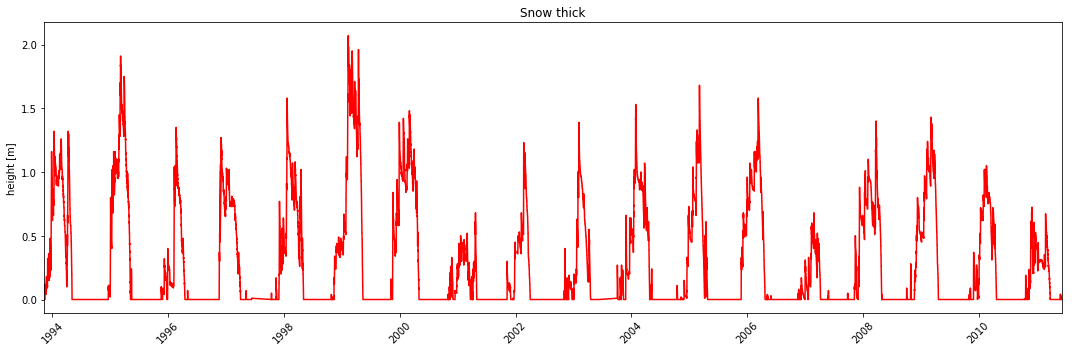

In [15]:
plt.figure(figsize = (15,5))
plt.plot(hor_disk.index, hor_disk['Snow thick [m]'], color='red')
plt.xticks(rotation=45)
plt.xlim(hor_disk.index.min(), hor_disk.index.max())
plt.ylabel("height [m]")
plt.title("Snow thick")
plt.tight_layout()
plt.show()

## 4. CDP_hor_eval


In [16]:
hor_eval = pd.read_csv('CDP_hor_eval.tab', sep='\t',
                         parse_dates = ['Date/Time'], # Date format is correct
                         index_col = ['Date/Time'], # No more element indexes
                         dayfirst = True) # Coherent date format

print("list(hor_eval) = ", list(hor_eval))
print("len(daily_eval) = ", len(hor_eval))
print("start = ", hor_eval.index.min())
print("end   = ", hor_eval.index.max())
hor_eval.head()

list(hor_eval) =  ['Snow thick [m]', 't [°C]', 'Runoff [kg/m**2/day] (Lysimeter, 1 m**2)', 'Runoff [kg/m**2/day] (Lysimeter, 5 m**2)', 'Ground heat flux [W/m**2] (replicate 1)', 'Ground heat flux [W/m**2] (replicate 2)', 'Ground heat flux [W/m**2] (replicate 3)', 'Albedo [%]']
len(daily_eval) =  119109
start =  1993-11-10 00:00:00
end   =  2011-06-12 00:00:00


,Snow thick [m],t [°C],"Runoff [kg/m**2/day] (Lysimeter, 1 m**2)","Runoff [kg/m**2/day] (Lysimeter, 5 m**2)",Ground heat flux [W/m**2] (replicate 1),Ground heat flux [W/m**2] (replicate 2),Ground heat flux [W/m**2] (replicate 3),Albedo [%]
Date/Time,,,,,,,,
1993-11-10 00:00:00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1993-11-10 01:00:00,0.0,NaN,4.8,NaN,NaN,NaN,NaN,NaN
1993-11-10 02:00:00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1993-11-10 03:00:00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1993-11-10 04:00:00,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


### Find NaN

In [17]:
df_NaN = hor_eval.isna().sum()
df_NaN_perc = df_NaN/len(hor_eval)*100

print(" -------------- NaN values -------------- ")
print(df_NaN)
print(" -------------- NaN percentage -------------- ")
print(df_NaN_perc)

 -------------- NaN values -------------- 
Snow thick [m]                               15477
t [°C]                                       66222
Runoff [kg/m**2/day] (Lysimeter, 1 m**2)     19990
Runoff [kg/m**2/day] (Lysimeter, 5 m**2)      5199
Ground heat flux [W/m**2] (replicate 1)     113873
Ground heat flux [W/m**2] (replicate 2)     113749
Ground heat flux [W/m**2] (replicate 3)     113877
Albedo [%]                                   81355
dtype: int64
 -------------- NaN percentage -------------- 
Snow thick [m]                              12.993980
t [°C]                                      55.597814
Runoff [kg/m**2/day] (Lysimeter, 1 m**2)    16.782947
Runoff [kg/m**2/day] (Lysimeter, 5 m**2)     4.364909
Ground heat flux [W/m**2] (replicate 1)     95.604027
Ground heat flux [W/m**2] (replicate 2)     95.499920
Ground heat flux [W/m**2] (replicate 3)     95.607385
Albedo [%]                                  68.302983
dtype: float64


### Plot data

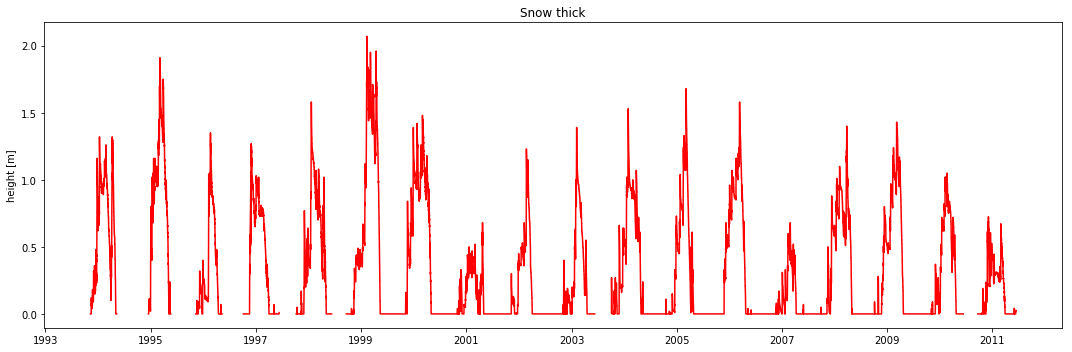

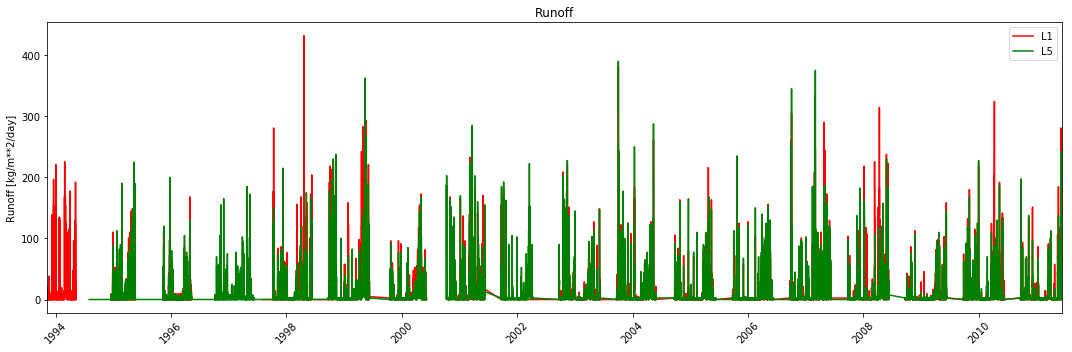

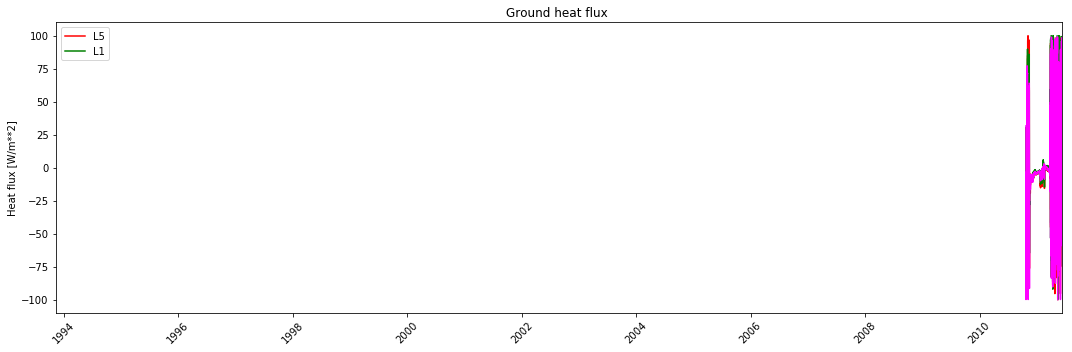

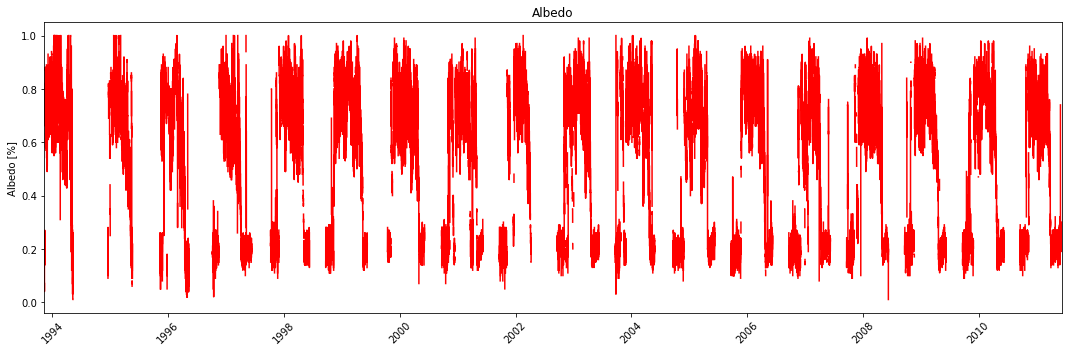

In [18]:
plt.figure(figsize = (15,5))
plt.plot(hor_eval.index, hor_eval['Snow thick [m]'], color='red')
plt.ylabel("height [m]")
plt.title("Snow thick")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(hor_eval.index, hor_eval['Runoff [kg/m**2/day] (Lysimeter, 1 m**2)'], color='red')
plt.plot(hor_eval.index, hor_eval['Runoff [kg/m**2/day] (Lysimeter, 5 m**2)'], color='green')
plt.xticks(rotation=45)
plt.xlim(hor_eval.index.min(), hor_eval.index.max())
plt.legend(['L1', 'L5']) 
plt.ylabel("Runoff [kg/m**2/day]")
plt.title("Runoff")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(hor_eval.index, hor_eval['Ground heat flux [W/m**2] (replicate 1)'], color='red')
plt.plot(hor_eval.index, hor_eval['Ground heat flux [W/m**2] (replicate 2)'], color='green')
plt.plot(hor_eval.index, hor_eval['Ground heat flux [W/m**2] (replicate 3)'], color='magenta')
plt.xticks(rotation=45)
plt.xlim(hor_eval.index.min(), hor_eval.index.max())
plt.legend(['L5', 'L1']) 
plt.ylabel("Heat flux [W/m**2]")
plt.title("Ground heat flux ")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(hor_eval.index, hor_eval['Albedo [%]'], color='red')
plt.xticks(rotation=45)
plt.xlim(hor_eval.index.min(), hor_eval.index.max())
plt.ylabel("Albedo [%]")
plt.title("Albedo")
plt.tight_layout()
plt.show()

## 5. CDP_met_insitu


In [19]:
met_insitu = pd.read_csv('CDP_met_insitu.tab', sep='\t',
                         parse_dates = ['Date/Time'], # Date format is correct
                         index_col = ['Date/Time'], # No more element indexes
                         dayfirst = True) # Coherent date format

print("list(met_insitu) = ", list(met_insitu))
print("len(met_insitu) = ", len(met_insitu))
print("start = ", met_insitu.index.min())
print("end   = ", met_insitu.index.max())
met_insitu.head()

list(met_insitu) =  ['TTT [°C]', 'Humidity spec [g/kg]', 'ff [m/s]', 'Precip rain [kg/m**2/s]', 'Precip snow [kg/m**2/s]', 'LWD [W/m**2]', 'DIR [W/m**2]', 'DIF [W/m**2]', 'PoPoPoPo [hPa]']
len(met_insitu) =  103995
start =  1993-11-10 00:00:00
end   =  2011-06-12 00:00:00


,TTT [°C],Humidity spec [g/kg],ff [m/s],Precip rain [kg/m**2/s],Precip snow [kg/m**2/s],LWD [W/m**2],DIR [W/m**2],DIF [W/m**2],PoPoPoPo [hPa]
Date/Time,,,,,,,,,
1993-11-10 00:00:00,0.66,4.4864,0.1,0.0,0.0,295.826,0.0,0.278,872.6
1993-11-10 01:00:00,0.11,4.2662,0.5,0.0,0.0,259.444,0.0,0.000,872.1
1993-11-10 02:00:00,0.13,4.3170,0.4,0.0,0.0,265.556,0.0,0.000,871.9
1993-11-10 03:00:00,-0.52,4.1171,0.2,0.0,0.0,253.604,0.0,0.278,871.9
1993-11-10 04:00:00,-0.38,4.1594,0.1,0.0,0.0,245.833,0.0,0.000,871.7


### Find NaN 

In [20]:
df_NaN = met_insitu.isna().sum()
df_NaN_perc = df_NaN/len(met_insitu)*100

print(" -------------- NaN values -------------- ")
print(df_NaN)
print(" -------------- NaN percentage -------------- ")
print(df_NaN_perc)

 -------------- NaN values -------------- 
TTT [°C]                   0
Humidity spec [g/kg]       0
ff [m/s]                   0
Precip rain [kg/m**2/s]    0
Precip snow [kg/m**2/s]    0
LWD [W/m**2]               0
DIR [W/m**2]               0
DIF [W/m**2]               0
PoPoPoPo [hPa]             0
dtype: int64
 -------------- NaN percentage -------------- 
TTT [°C]                   0.0
Humidity spec [g/kg]       0.0
ff [m/s]                   0.0
Precip rain [kg/m**2/s]    0.0
Precip snow [kg/m**2/s]    0.0
LWD [W/m**2]               0.0
DIR [W/m**2]               0.0
DIF [W/m**2]               0.0
PoPoPoPo [hPa]             0.0
dtype: float64


### Select time interval for the analysis

In [21]:
# Select time period
ref_start = '2001-09-21 00:00'
ref_end   = '2002-04-10 00:00'

In [22]:
# Select a data subset for the chosen period (observations)
met_insitu = met_insitu[(met_insitu.index >= ref_start) & (met_insitu.index <= ref_end)]

print("len(dataset) = ", len(met_insitu))
print("start = ", met_insitu.index.min())
print("end   = ", met_insitu.index.max())
met_insitu.head()

len(dataset) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


,TTT [°C],Humidity spec [g/kg],ff [m/s],Precip rain [kg/m**2/s],Precip snow [kg/m**2/s],LWD [W/m**2],DIR [W/m**2],DIF [W/m**2],PoPoPoPo [hPa]
Date/Time,,,,,,,,,
2001-09-21 00:00:00,8.48,6.9676,0.6,0.000000,0.0,328.333,0.0,0.0,871.5
2001-09-21 01:00:00,7.11,7.0759,1.2,0.000274,0.0,351.389,0.0,0.0,871.5
2001-09-21 02:00:00,7.06,7.0516,0.4,0.000000,0.0,341.944,0.0,0.0,871.2
2001-09-21 03:00:00,6.69,6.6604,0.4,0.000000,0.0,326.111,0.0,0.0,870.9
2001-09-21 04:00:00,6.14,6.2747,0.3,0.000000,0.0,288.056,0.0,0.0,870.7


### Convert specific humidity in relative humidity

In [53]:
def q2rh(qa,p_atm,Ta):
    ''' 
    Function to calculate rh from q
    - rh:    relative humidity [%]
    - qa:    specific humidity [g/kg]
    - p_atm: pressure [hpa]
    - Ta:    air temperature [°C]
    '''
    Tk = 273.15
    
    a1 = 373.15
    a2 = 13.3185
    a3 = 3.952
    a4 = 1.9335
    a5 = 0.5196

    b1 = 1013.25
    b2 = 13.3185
    b3 = 1.9760
    b4 = 0.6445
    b5 = 0.1299

    Tak = Ta+Tk     
    tr = 1-373.15/Tak
    estar = b1*math.exp(b2*tr - b3*(tr**2) - b4*(tr**3) - b5*(tr**4))
    qasat = 0.622*estar/(p_atm-0.378*estar)
    rh = qa/1000/qasat*100
    return rh

q2rh_vector = np.vectorize(q2rh)

In [54]:
rh = q2rh_vector(met_insitu['Humidity spec [g/kg]'].values, 
          met_insitu['PoPoPoPo [hPa]'].values, 
          met_insitu['TTT [°C]'].values)
rh

array([87.70997803, 97.83895813, 97.80556667, ..., 81.57987643,
       76.55814696, 76.50607766])

### Create dataframe

In [59]:
df = pd.DataFrame({'Date': met_insitu.index, 
                   'Prec': (met_insitu['Precip rain [kg/m**2/s]']+met_insitu['Precip snow [kg/m**2/s]'])*3600,
                   'Ws': met_insitu['ff [m/s]'],
                   'RH': rh,
                   'Tair': met_insitu['TTT [°C]'], 
                   'SWdir': met_insitu['DIR [W/m**2]'],
                   'SWdif': met_insitu['DIF [W/m**2]'], 
                   'SW': met_insitu['DIR [W/m**2]']+met_insitu['DIF [W/m**2]'],
                   'LW': met_insitu['LWD [W/m**2]']},
                  columns =['Date','Prec','Ws','RH','Tair','SWdir','SWdif','SW','LW'])
df = df.set_index('Date')
df.head()

,Prec,Ws,RH,Tair,SWdir,SWdif,SW,LW
Date,,,,,,,,
2001-09-21 00:00:00,0.00000,0.6,87.709978,8.48,0.0,0.0,0.0,328.333
2001-09-21 01:00:00,0.98532,1.2,97.838958,7.11,0.0,0.0,0.0,351.389
2001-09-21 02:00:00,0.00000,0.4,97.805567,7.06,0.0,0.0,0.0,341.944
2001-09-21 03:00:00,0.00000,0.4,94.735807,6.69,0.0,0.0,0.0,326.111
2001-09-21 04:00:00,0.00000,0.3,92.693283,6.14,0.0,0.0,0.0,288.056


### Plot data

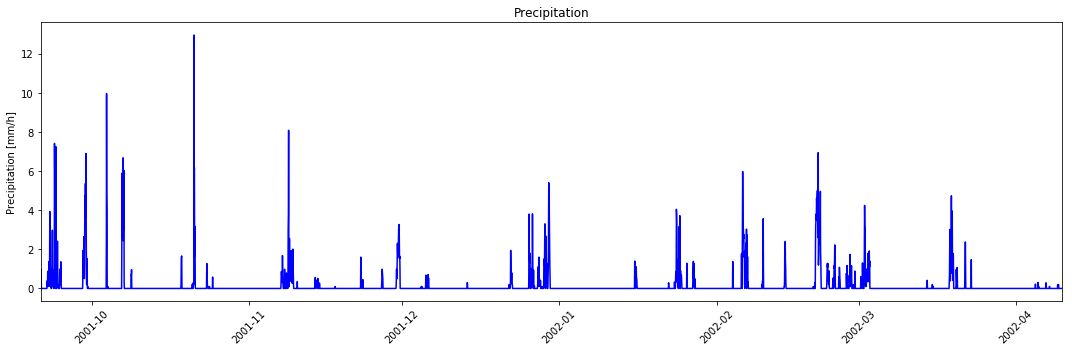

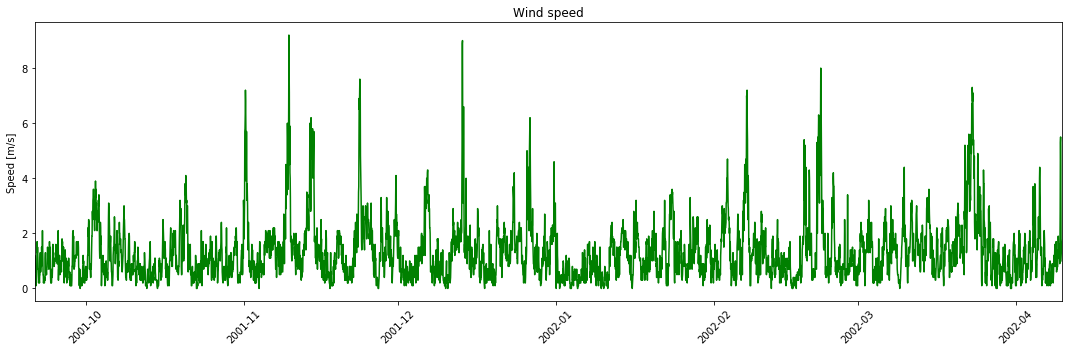

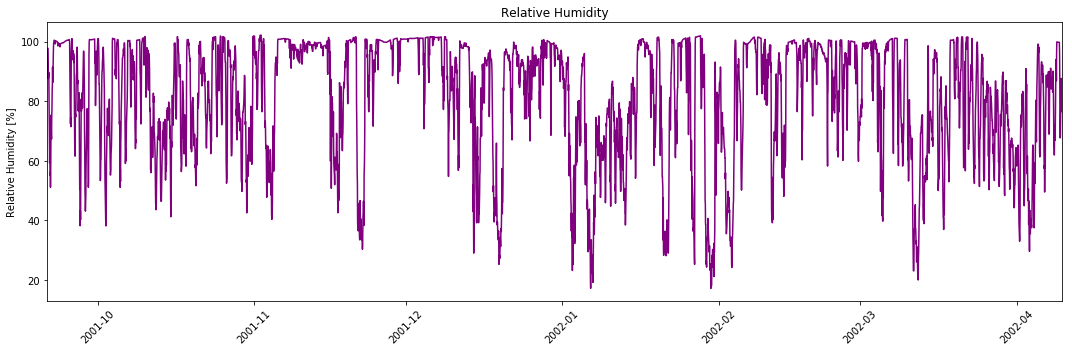

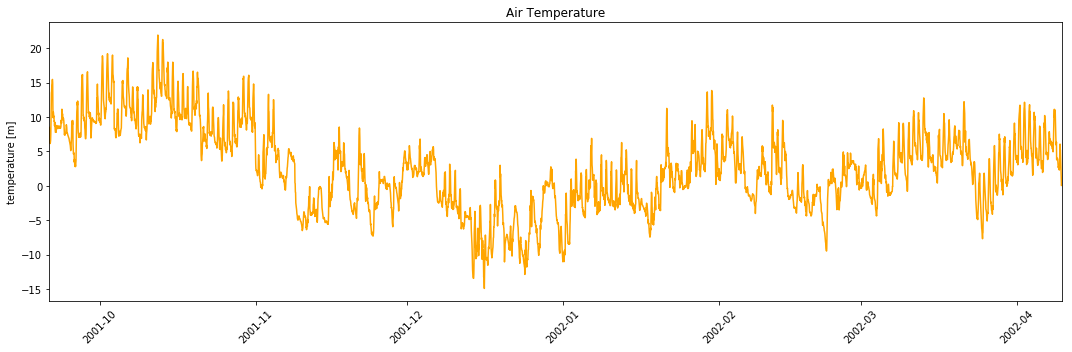

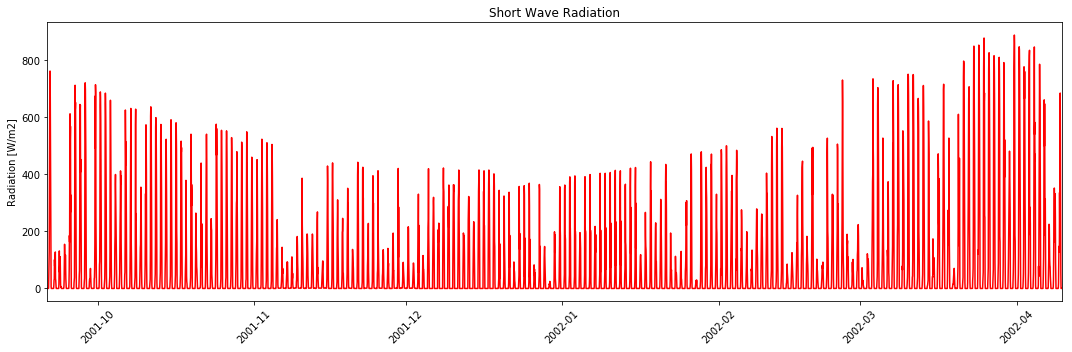

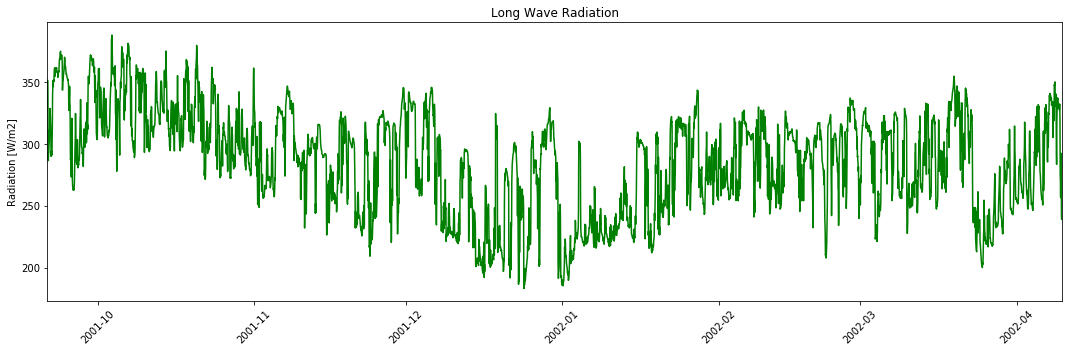

In [61]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Prec'], color='blue')
plt.xticks(rotation=45)
plt.xlim(df.index.min(), df.index.max())
plt.ylabel("Precipitation [mm/h]")
plt.title("Precipitation")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(df.index, df['Ws'], color='green')
plt.xticks(rotation=45)
plt.xlim(df.index.min(), df.index.max())
plt.ylabel("Speed [m/s]")
plt.title("Wind speed")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(df.index, df['RH'], color='purple')
plt.xticks(rotation=45)
plt.xlim(df.index.min(), df.index.max())
plt.title("Relative Humidity")
plt.ylabel("Relative Humidity [%]")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(df.index, df['Tair'], color='orange')
plt.xticks(rotation=45)
plt.xlim(df.index.min(), df.index.max())
plt.ylabel("temperature [m]")
plt.title("Air Temperature")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(df.index, df['SW'], color='red')
# plt.plot(df.index, df['SWdir'], color='orange')
# plt.plot(df.index, df['SWdif'], color='green')
plt.xticks(rotation=45)
plt.xlim(df.index.min(), df.index.max())
plt.ylabel("Radiation [W/m2]")
plt.title("Short Wave Radiation")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(df.index, df['LW'], color='green')
plt.xticks(rotation=45)
plt.xlim(df.index.min(), df.index.max())
plt.ylabel("Radiation [W/m2]")
plt.title("Long Wave Radiation")
plt.tight_layout()
plt.show()

### Change datetime format

In [62]:
df.index = df.index.strftime("%d/%m/%Y %H:%M")

print("len(dataset) = ", len(df))
print(df.head())
print(" ------------------------------------ ")
print(df.tail())

len(dataset) =  4825
                     Prec   Ws         RH  Tair  SWdir  SWdif   SW       LW
21/09/2001 00:00  0.00000  0.6  87.709978  8.48    0.0    0.0  0.0  328.333
21/09/2001 01:00  0.98532  1.2  97.838958  7.11    0.0    0.0  0.0  351.389
21/09/2001 02:00  0.00000  0.4  97.805567  7.06    0.0    0.0  0.0  341.944
21/09/2001 03:00  0.00000  0.4  94.735807  6.69    0.0    0.0  0.0  326.111
21/09/2001 04:00  0.00000  0.3  92.693283  6.14    0.0    0.0  0.0  288.056
 ------------------------------------ 
                  Prec   Ws         RH  Tair  SWdir  SWdif   SW       LW
09/04/2002 20:00   0.0  1.7  87.642411  1.06    0.0    0.0  0.0  259.722
09/04/2002 21:00   0.0  1.5  87.603915  0.03    0.0    0.0  0.0  241.944
09/04/2002 22:00   0.0  1.2  81.579876  0.17    0.0    0.0  0.0  238.889
09/04/2002 23:00   0.0  1.0  76.558147  0.20    0.0    0.0  0.0  251.389
10/04/2002 00:00   0.0  1.0  76.506078  0.24    0.0    0.0  0.0  269.722


### Save output to file

In [63]:
meteo_file = df.to_csv("meteo0001.txt", sep=',',index=True, index_label='Date')

In [64]:
os.getcwd()

'/home/elisa/paper_GEOtop/tests/ColdelaPorte/data_observed/Morin2012/datasets'

In [27]:
# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['TTT [°C]'], color='red')
# plt.ylabel("temperature [m]")
# plt.title("Air Temperature")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['Humidity spec [g/kg]'], color='red')
# plt.xticks(rotation=45)
# plt.xlim(met_insitu.index.min(), met_insitu.index.max())
# plt.ylabel("Humidity [g/kg]")
# plt.title("Humidity spec")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['ff [m/s]'], color='red')
# plt.xticks(rotation=45)
# plt.xlim(met_insitu.index.min(), met_insitu.index.max())
# plt.ylabel("speed [m/s]")
# plt.title("Wind speed")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['Precip rain [kg/m**2/s]'], color='red')
# plt.plot(met_insitu.index, met_insitu['Precip snow [kg/m**2/s]'], color='blue')
# plt.xticks(rotation=45)
# plt.xlim(met_insitu.index.min(), met_insitu.index.max())
# plt.legend(['Rain', 'Snow']) 
# plt.ylabel("Precipitation [kg/m**2/s]")
# plt.title("Precipitation")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['LWD [W/m**2]'], color='red')
# plt.plot(met_insitu.index, met_insitu['DIR [W/m**2]'], color='blue')
# plt.plot(met_insitu.index, met_insitu['DIF [W/m**2]'], color='magenta')
# plt.xticks(rotation=45)
# plt.xlim(met_insitu.index.min(), met_insitu.index.max())
# plt.legend(['LWD', 'DIR', 'DIF']) 
# plt.ylabel("Radiation [W/m**2]")
# plt.title("Radiation")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['PoPoPoPo [hPa]'], color='blue')
# plt.xticks(rotation=45)
# plt.xlim(met_insitu.index.min(), met_insitu.index.max())
# plt.ylabel("PoPoPoPo [hPa]")
# plt.title("PoPoPoPo")
# plt.tight_layout()
# plt.show()

## 6. CDP_soil_temp


In [28]:
soil_temp = pd.read_csv('CDP_soil_temp.tab', sep='\t',
                         parse_dates = ['Date/Time'], # Date format is correct
                         index_col = ['Date/Time'], # No more element indexes
                         dayfirst = True) # Coherent date format

print("list(soil_temp) = ", list(soil_temp))
print("len(met_insitu) = ", len(soil_temp))
print("start = ", soil_temp.index.min())
print("end   = ", soil_temp.index.max())
soil_temp.head()

list(soil_temp) =  ['Depth [m]', 't [°C]']
len(met_insitu) =  292524
start =  1993-11-10 00:00:00
end   =  2011-06-12 00:00:00


,Depth [m],t [°C]
Date/Time,,
1993-11-10 00:00:00,0.1,5.06
1993-11-10 00:00:00,0.2,5.88
1993-11-10 00:00:00,0.5,6.63
1993-11-10 01:00:00,0.1,4.98
1993-11-10 01:00:00,0.2,5.83


### Find NaN

In [29]:
df_NaN = soil_temp.isna().sum()
df_NaN_perc = df_NaN/len(soil_temp)*100

print(" -------------- NaN values -------------- ")
print(df_NaN)
print(" -------------- NaN percentage -------------- ")
print(df_NaN_perc)

 -------------- NaN values -------------- 
Depth [m]    0
t [°C]       0
dtype: int64
 -------------- NaN percentage -------------- 
Depth [m]    0.0
t [°C]       0.0
dtype: float64


### Plot data

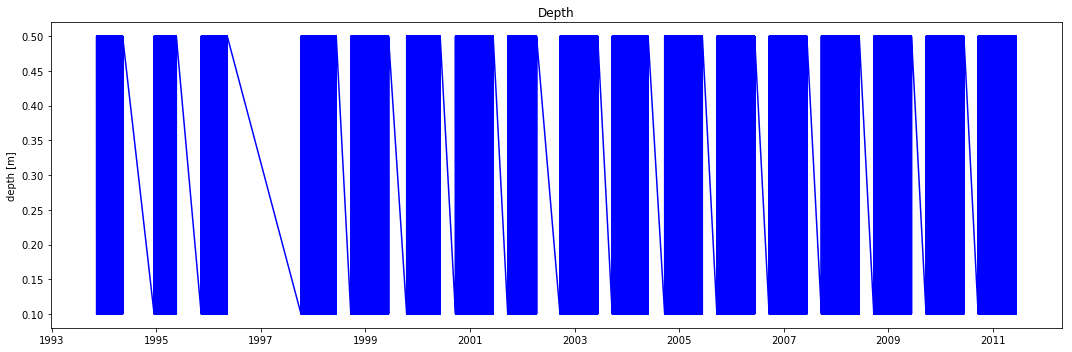

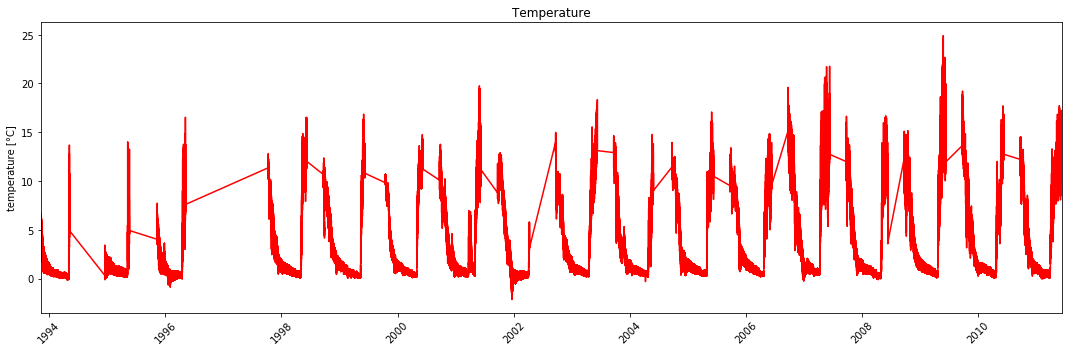

In [30]:
plt.figure(figsize = (15,5))
plt.plot(soil_temp.index, soil_temp['Depth [m]'], color='blue')
plt.ylabel("depth [m]")
plt.title("Depth")
plt.tight_layout()
plt.show()

plt.figure(figsize = (15,5))
plt.plot(soil_temp.index, soil_temp['t [°C]'], color='red')
plt.xticks(rotation=45)
plt.xlim(soil_temp.index.min(), soil_temp.index.max())
plt.ylabel("temperature [°C]")
plt.title("Temperature")
plt.tight_layout()
plt.show()

## 7. CDP_solar_mask

In [31]:
solar_mask = pd.read_csv('CDP_solar_mask.tab', sep='\t')

print("len(met_insitu) = ", len(solar_mask))
print("start = ", solar_mask.index.min())
print("end   = ", solar_mask.index.max())
solar_mask.head()

len(met_insitu) =  72
start =  0
end   =  71


,Azim [deg],alpha [deg] (up),alpha [deg] (down),Perc [%]
0,5,10,10,50
1,10,14,14,50
2,15,22,22,50
3,20,25,25,50
4,25,26,26,50


### Find NaN

In [32]:
df_NaN = solar_mask.isna().sum()
df_NaN_perc = df_NaN/len(solar_mask)*100

print(" -------------- NaN values -------------- ")
print(df_NaN)
print(" -------------- NaN percentage -------------- ")
print(df_NaN_perc)

 -------------- NaN values -------------- 
Azim [deg]            0
alpha [deg] (up)      0
alpha [deg] (down)    0
Perc [%]              0
dtype: int64
 -------------- NaN percentage -------------- 
Azim [deg]            0.0
alpha [deg] (up)      0.0
alpha [deg] (down)    0.0
Perc [%]              0.0
dtype: float64


## Zoom on 2001-2002

In [33]:
# Select time period
ref_start = '2001-08-01'
ref_end   = '2002-09-01'

## 1. CDP_daily_eval

In [34]:
daily_eval = daily_eval[(daily_eval.index >= ref_start) & (daily_eval.index <= ref_end)]

print("len(dataset) = ", len(daily_eval))
print("start = ", daily_eval.index.min())
print("end   = ", daily_eval.index.max())

len(dataset) =  263
start =  2001-09-21 00:00:00
end   =  2002-06-10 00:00:00


## 5. CDP_met_insitu


In [35]:
# Select a data subset for the chosen period (observations)
met_insitu = met_insitu[(met_insitu.index >= ref_start) & (met_insitu.index <= ref_end)]

print("len(dataset) = ", len(met_insitu))
print("start = ", met_insitu.index.min())
print("end   = ", met_insitu.index.max())

len(dataset) =  4825
start =  2001-09-21 00:00:00
end   =  2002-04-10 00:00:00


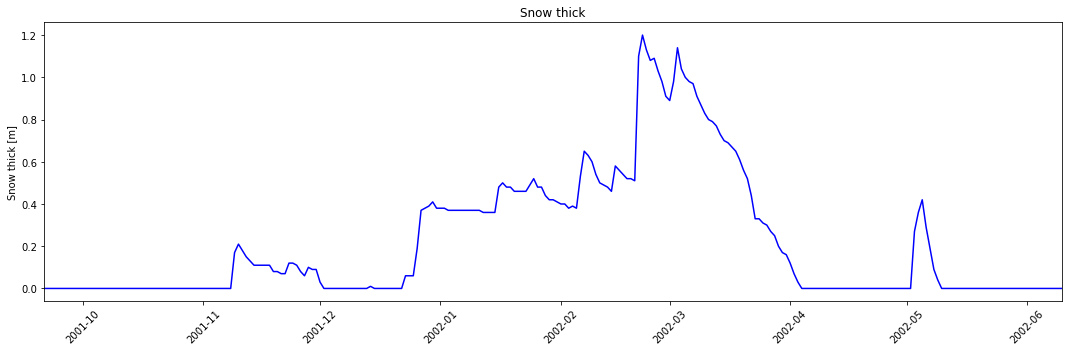

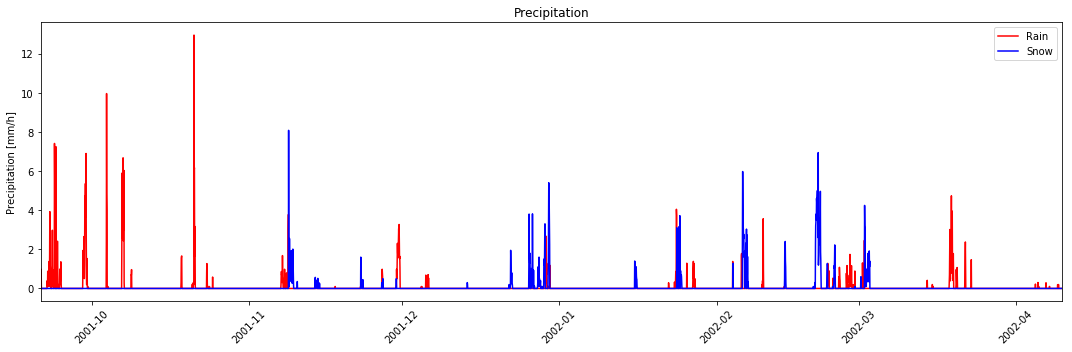

In [36]:
# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['TTT [°C]'], color='red')
# plt.ylabel("temperature [m]")
# plt.title("Temperature ???")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['Humidity spec [g/kg]'], color='red')
# plt.xticks(rotation=45)
# plt.xlim(met_insitu.index.min(), met_insitu.index.max())
# plt.ylabel("Humidity [g/kg]")
# plt.title("Humidity spec")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['ff [m/s]'], color='red')
# plt.xticks(rotation=45)
# plt.xlim(met_insitu.index.min(), met_insitu.index.max())
# plt.ylabel("ff [m/s]")
# plt.title("ff ???")
# plt.tight_layout()
# plt.show()

plt.figure(figsize = (15,5))
plt.plot(daily_eval.index, daily_eval['Snow thick [m] (Ultra-sound or laser depth ra...)'], color='blue')
plt.xticks(rotation=45)
plt.xlim(daily_eval.index.min(), daily_eval.index.max())
plt.ylabel("Snow thick [m]")
plt.title("Snow thick")
plt.tight_layout()
plt.savefig("Snow_thick.png")
plt.show()

plt.figure(figsize = (15,5))
plt.plot(met_insitu.index, met_insitu['Precip rain [kg/m**2/s]']*3600, color='red')
plt.plot(met_insitu.index, met_insitu['Precip snow [kg/m**2/s]']*3600, color='blue')
plt.xticks(rotation=45)
plt.xlim(met_insitu.index.min(), met_insitu.index.max())
plt.legend(['Rain', 'Snow']) 
plt.ylabel("Precipitation [mm/h]")
plt.title("Precipitation")
plt.tight_layout()
plt.savefig("Prec_rain_snow.png")
plt.show()

# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['LWD [W/m**2]'], color='red')
# plt.plot(met_insitu.index, met_insitu['DIR [W/m**2]'], color='blue')
# plt.plot(met_insitu.index, met_insitu['DIF [W/m**2]'], color='magenta')
# plt.xticks(rotation=45)
# plt.xlim(met_insitu.index.min(), met_insitu.index.max())
# plt.legend(['LWD', 'DIR', 'DIF']) 
# plt.ylabel("Radiation [W/m**2]")
# plt.title("Radiation")
# plt.tight_layout()
# plt.show()

# plt.figure(figsize = (15,5))
# plt.plot(met_insitu.index, met_insitu['PoPoPoPo [hPa]'], color='blue')
# plt.xticks(rotation=45)
# plt.xlim(met_insitu.index.min(), met_insitu.index.max())
# plt.ylabel("PoPoPoPo [hPa]")
# plt.title("PoPoPoPo ???")
# plt.tight_layout()
# plt.show()